## EAD0830 - IA e ML Aplicados a Finanças
### Atividade Computacional 2

Objetivo: desenvolver uma competição para a construção de melhores modelos para classificação

- Case de analise de dados. Cada equipe deverá selecionar um modelo de classificação dentre os avaliados em aula (regressao logística ou k-NN), assim como considerar qualquer metodo de sua
preferência

### Pré-Processamento dos Dados

#### Import das Bibliotecas

In [1]:
from utils.DataManager import DataManager
from utils.CrossValidation import CrossValidation
from utils.Sampling import sampling_SMOTEK, sampling_Random
from utils.Metrics import calculate_metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#### Ingestão dos Dados

In [2]:
data_manager = DataManager(r'data\Train.xlsx')

Deve-se checar as proporções de cada classe, 0 sendo transação regular e 1 sendo transação fraudulenta

In [3]:
df = data_manager.get_original_df()

Class
0    99.785059
1     0.214941
Name: proportion, dtype: float64


> Classes muito desbalanceades, 1 ocorre em apenas 0.21% das amostras

Realiza-se a subdivisão da amostra 'Treino.xlsx' disponibilizada para treino e teste, respeitando o balanceamento das classes. Neste caso, cada conjunto contém aproximadamente o mesmo percentual de amostras de cada classe alvo que o conjunto completo. Parâmetro `stratify`

In [4]:
X_train, X_test, y_train, y_test = data_manager.train_test_splits(0.7)

data_manager.get_class_propotion(y_train)

Class
0    99.785145
1     0.214855
Name: proportion, dtype: float64

Antes de Criarmos o modelo podemos utilizar uma técnica de re-amostragem para tentar melhorar a previsão do modelo.

In [5]:
X_train_sampled, y_train_sampled = sampling_SMOTEK(X_train, y_train)

data_manager.get_class_propotion(y_train_sampled)

Class
0    50.0
1    50.0
Name: proportion, dtype: float64

In [6]:
# X_train_sampled, y_train_sampled = sampling_Random(X_train, y_train)

# data_manager.get_class_propotion(y_train_sampled)

In [7]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

PCA Principal Component Analysis

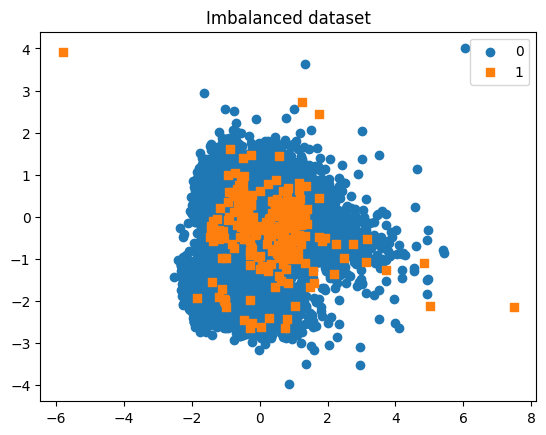

In [8]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

plot_2d_space(X_pca, y_train, 'Imbalanced dataset')

## Modelos

### Regressão Logística

Cria-se uma instância da classe de  validação cruzada e treina o modelo em 5 folds, priorizando a métrica de ROC_AUC

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LogisticRegression(C=1, class_weight={0: 1, 1: 1}, random_state=0)


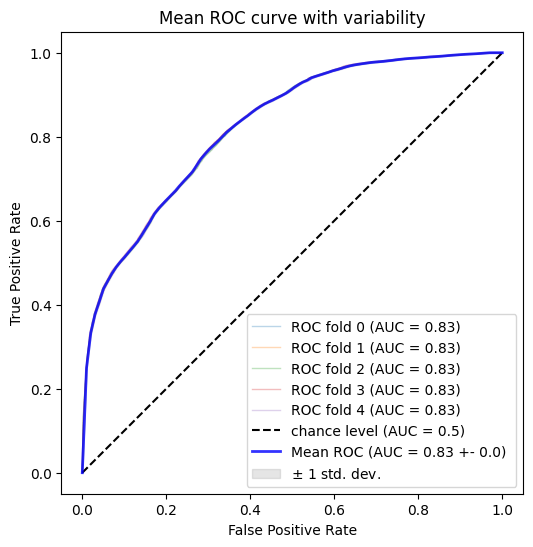

In [9]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=0, C=1)
cross_validation = CrossValidation(X_train_sampled, y_train_sampled, model=logit, n_splits=5)

params = [{
    # 'C': np.linspace(0, 10, 11),
    'class_weight': [{0:0.1, 1:0.9}, {0: 0.05, 1: 0.95}, {0: 0.01, 1: 0.99}, {0:1,1:10}, {0:1,1:100}, {0:1, 1:1}],
    'fit_intercept': [True,False]
}]

best_logit, best_params = cross_validation.grid_search(params=params, scoring='roc_auc')

logit = logit.set_params(**best_params)
cross_validation.roc_cv_visualization(model=logit)

Após a validação e grid search, deve-se treinar o modelo com a totalidade de dados disponíveis para treino

In [10]:
logit.fit(X_train_sampled, y_train_sampled)

LogisticRegression(C=1, class_weight={0: 1, 1: 1}, random_state=0)

Analisam-se as métricas de treino

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88    114714
           1       0.01      0.69      0.01       247

    accuracy                           0.78    114961
   macro avg       0.50      0.74      0.44    114961
weighted avg       1.00      0.78      0.87    114961

Balanced Accuracy Score: 0.74
Matthews Correlation Coefficient: 0.05283282017265657
ROC AUC Score: 0.8286208566998412


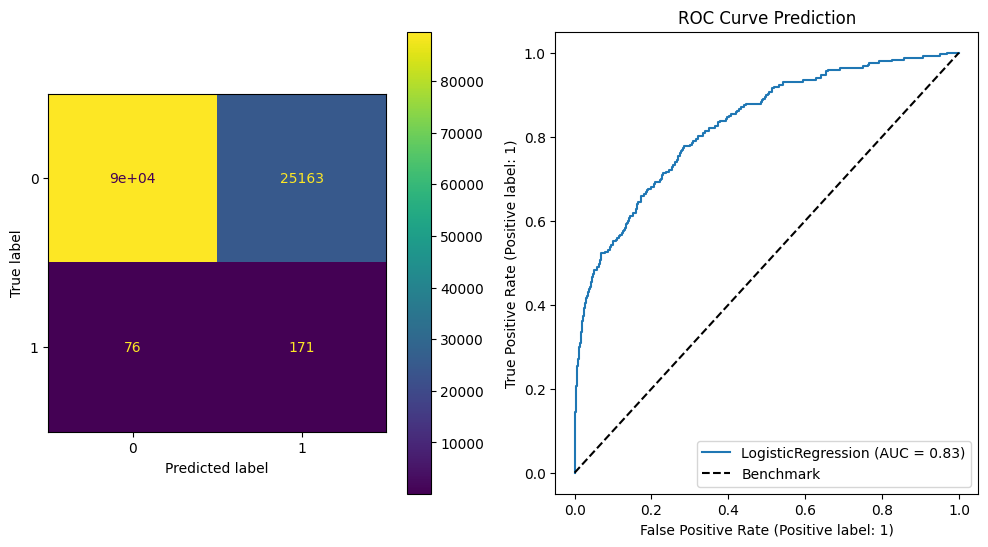

In [11]:
yhat = logit.predict(X_train)
calculate_metrics(X_train, y_train, yhat, model=logit)

Analisam-se as métricas para a amostra teste.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88     49164
           1       0.01      0.62      0.01       106

    accuracy                           0.78     49270
   macro avg       0.50      0.70      0.45     49270
weighted avg       1.00      0.78      0.88     49270

Balanced Accuracy Score: 0.7
Matthews Correlation Coefficient: 0.045581700616199636
ROC AUC Score: 0.7815776001154395


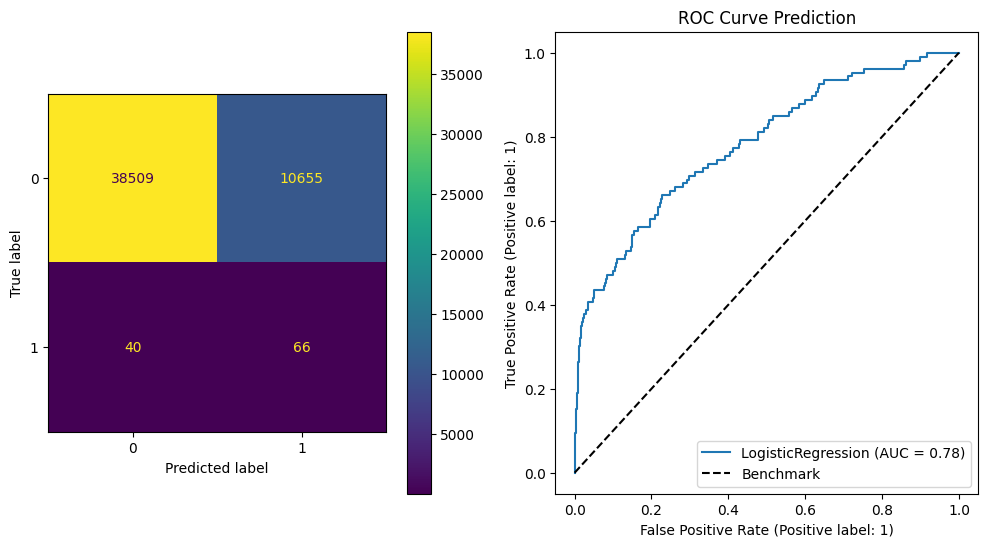

In [12]:
yhat = logit.predict(X_test)
calculate_metrics(X_test, y_test, yhat, model=logit)

### KNeighbors

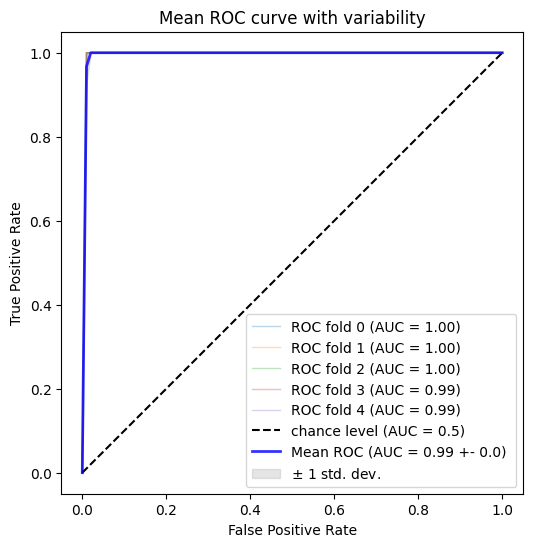

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kneighbors = KNeighborsClassifier()
cross_validation = CrossValidation(X_train_sampled, y_train_sampled, model=kneighbors, n_splits=5)

# params = [{
#     # 'C': np.linspace(0, 10, 11),
#     'class_weight': [{0:0.1, 1:0.9}, {0: 0.05, 1: 0.95}, {0: 0.01, 1: 0.99}, {0:1,1:10}, {0:1,1:100}, {0:1, 1:1}],
#     'fit_intercept': [True,False]
# }]

# best_logit, best_params = cross_validation.grid_search(params=params, scoring='roc_auc')

# kneighbors = kneighbors.set_params(**best_params)
cross_validation.roc_cv_visualization(model=kneighbors)

In [14]:
kneighbors.fit(X_train_sampled, y_train_sampled)

KNeighborsClassifier()

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    114714
           1       0.12      1.00      0.22       247

    accuracy                           0.98    114961
   macro avg       0.56      0.99      0.60    114961
weighted avg       1.00      0.98      0.99    114961

Balanced Accuracy Score: 0.99
Matthews Correlation Coefficient: 0.3454919056842135
ROC AUC Score: 1.0


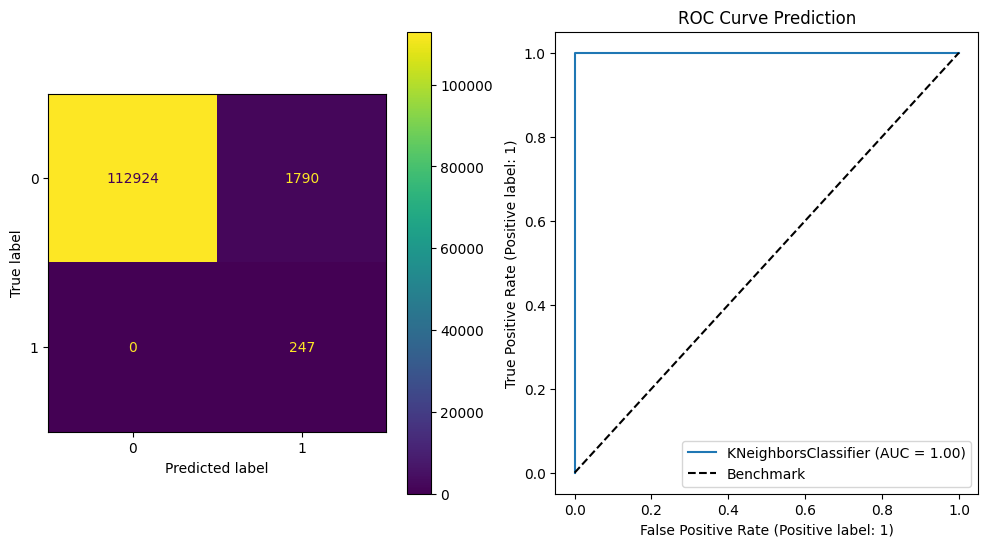

In [15]:
yhat = kneighbors.predict(X_train)
calculate_metrics(X_train, y_train, yhat, model=kneighbors)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     49164
           1       0.02      0.15      0.03       106

    accuracy                           0.98     49270
   macro avg       0.51      0.56      0.51     49270
weighted avg       1.00      0.98      0.99     49270

Balanced Accuracy Score: 0.56
Matthews Correlation Coefficient: 0.04152391058776123
ROC AUC Score: 0.5784523842418827


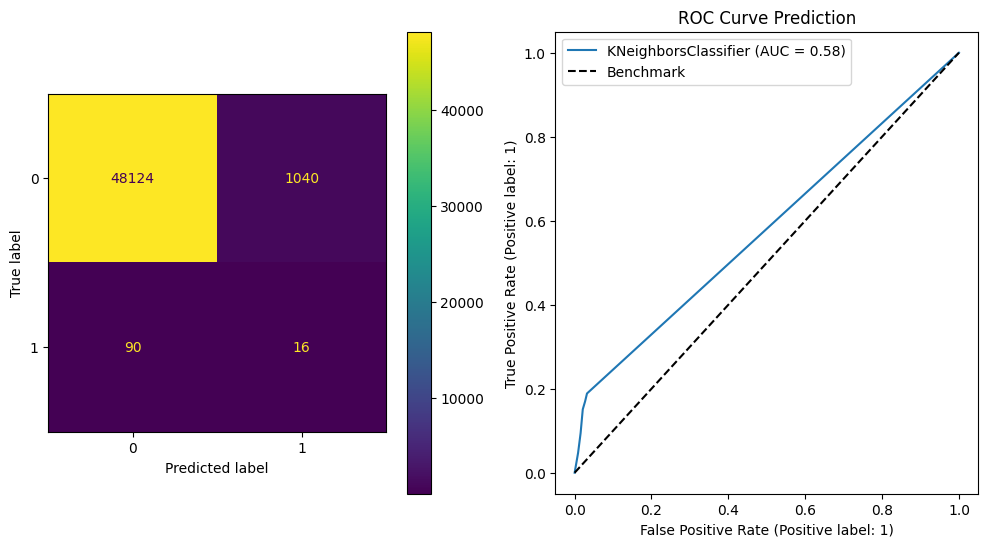

In [16]:
yhat = kneighbors.predict(X_test)
calculate_metrics(X_test, y_test, yhat, model=kneighbors)

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
# cross_validation = CrossValidation(X_train_sampled, y_train_sampled, model=rf, n_splits=5)

# params = [{
#     # 'C': np.linspace(0, 10, 11),
#     'class_weight': [{0:0.1, 1:0.9}, {0: 0.05, 1: 0.95}, {0: 0.01, 1: 0.99}, {0:1,1:10}, {0:1,1:100}, {0:1, 1:1}],
#     'fit_intercept': [True,False]
# }]

# best_logit, best_params = cross_validation.grid_search(params=params, scoring='roc_auc')

# rf = rf.set_params(**best_params)
# cross_validation.roc_cv_visualization(model=rf)

In [18]:
rf.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier(random_state=0)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114714
           1       1.00      1.00      1.00       247

    accuracy                           1.00    114961
   macro avg       1.00      1.00      1.00    114961
weighted avg       1.00      1.00      1.00    114961

Balanced Accuracy Score: 1.0
Matthews Correlation Coefficient: 1.0
ROC AUC Score: 1.0


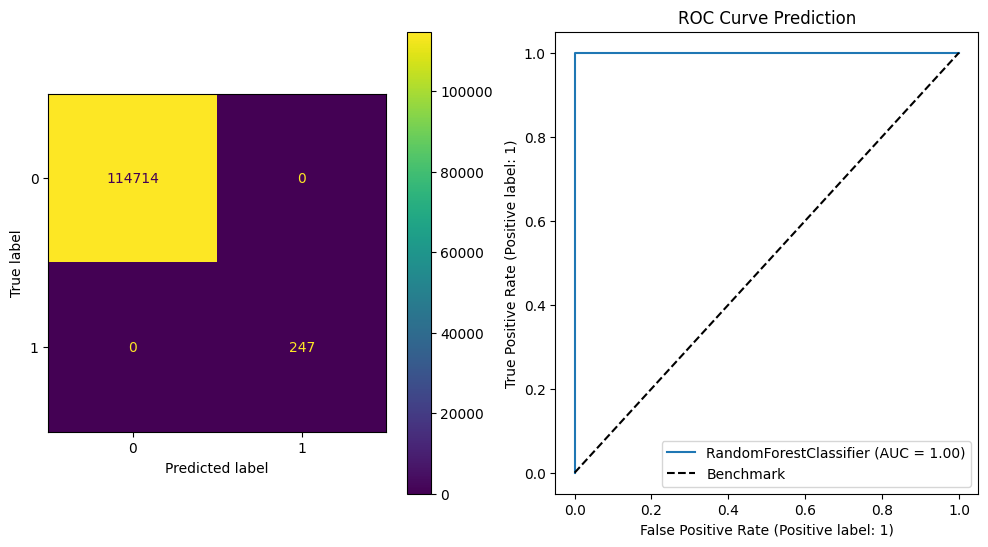

In [19]:
yhat = rf.predict(X_train)
calculate_metrics(X_train, y_train, yhat, model=rf)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49164
           1       0.01      0.01      0.01       106

    accuracy                           1.00     49270
   macro avg       0.51      0.50      0.50     49270
weighted avg       1.00      1.00      1.00     49270

Balanced Accuracy Score: 0.5
Matthews Correlation Coefficient: 0.01007320208578096
ROC AUC Score: 0.7832930753135827


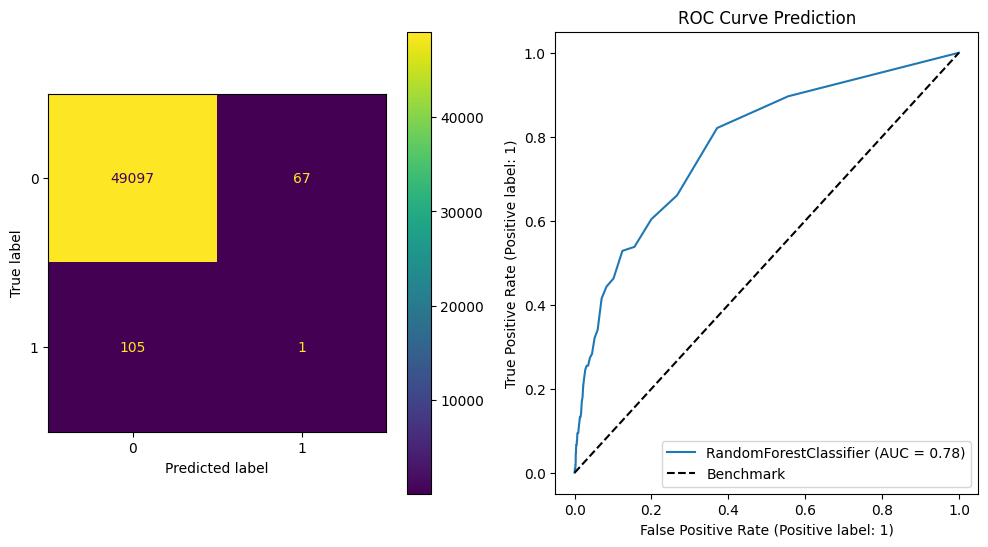

In [20]:
yhat = rf.predict(X_test)
calculate_metrics(X_test, y_test, yhat, model=rf)

### Support Vector Machine

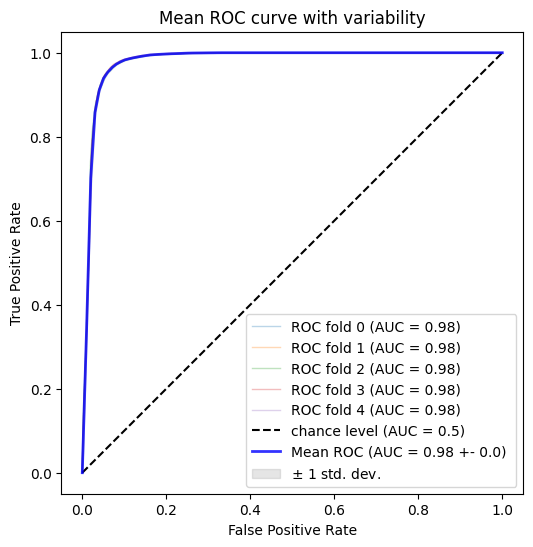

In [6]:
from sklearn.svm import SVC

svm = SVC(probability=True)
cross_validation = CrossValidation(X_train_sampled, y_train_sampled, model=svm, n_splits=5)

# params = [{
# }]

# best_logit, best_params = cross_validation.grid_search(params=params, scoring='roc_auc')

# svm = svm.set_params(**best_params)
cross_validation.roc_cv_visualization(model=svm)

In [7]:
svm.fit(X_train_sampled, y_train_sampled)

SVC()

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.94    114714
           1       0.02      0.98      0.04       247

    accuracy                           0.90    114961
   macro avg       0.51      0.94      0.49    114961
weighted avg       1.00      0.90      0.94    114961

Balanced Accuracy Score: 0.94
Matthews Correlation Coefficient: 0.13171050446511992


AttributeError: predict_proba is not available when  probability=False

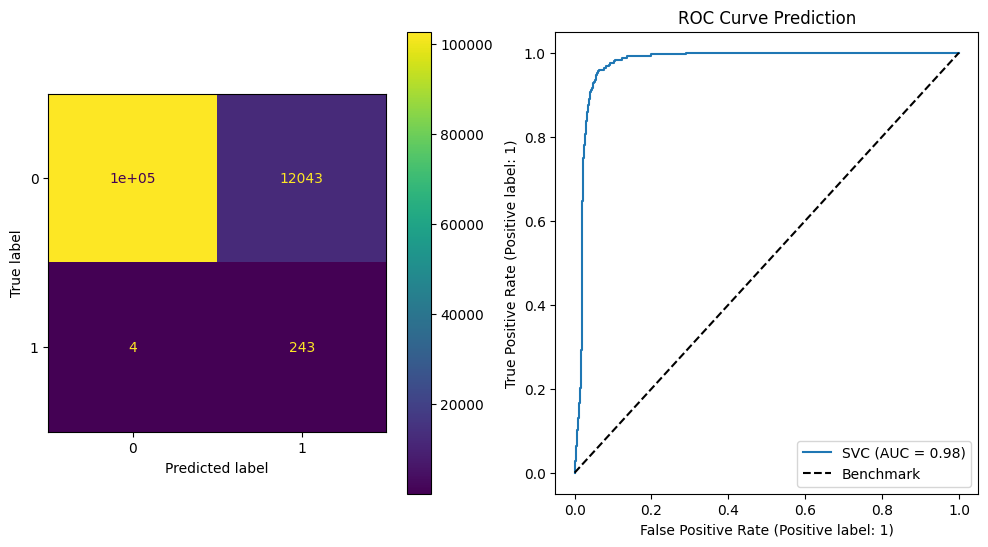

In [8]:
yhat = svm.predict(X_train)
calculate_metrics(X_train, y_train, yhat, model=svm)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.94     49164
           1       0.00      0.14      0.01       106

    accuracy                           0.89     49270
   macro avg       0.50      0.52      0.47     49270
weighted avg       1.00      0.89      0.94     49270

Balanced Accuracy Score: 0.52
Matthews Correlation Coefficient: 0.005573884470046609


AttributeError: predict_proba is not available when  probability=False

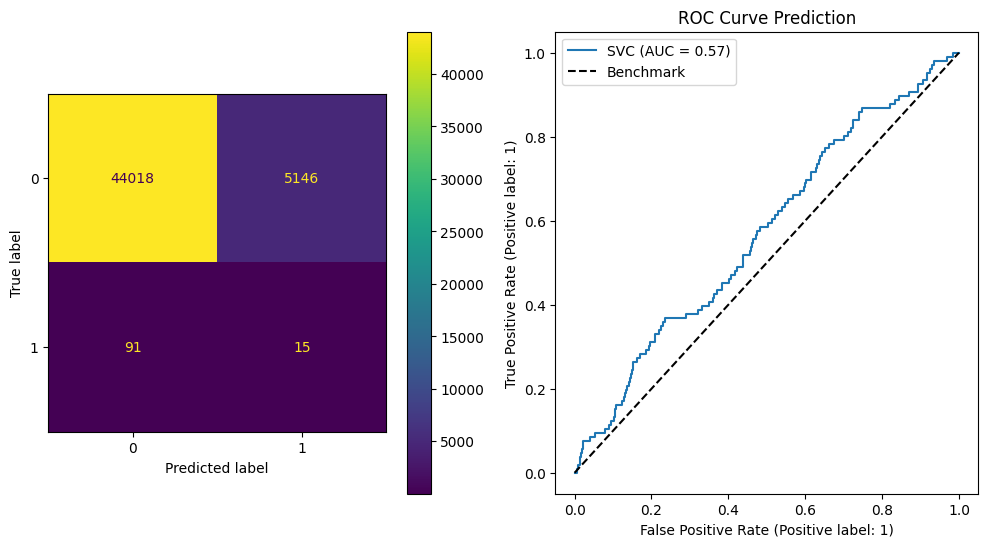

In [9]:
yhat = svm.predict(X_test)
calculate_metrics(X_test, y_test, yhat, model=svm)